In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('exercise.csv')
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, 3].values

In [3]:
x

array([5464, 6041,   25, 5461, 6915, 4545, 4340, 1230,   61, 1258, 3148,
       4687, 4732, 3519, 1580, 2822,  181, 3158, 4383, 3881, 4037,  202,
        292,  330, 2209, 4550, 4435, 4779, 1831, 2255,  539, 5464, 6041,
       4068, 4683, 4033, 6314,  614, 3149, 4005, 4880, 4136,  705,  570,
        269, 4275, 5999, 4421, 6930, 5195,  546,  493,  995, 1163, 6676,
       3608,  774, 1421, 4064, 2725, 5934, 1867, 3721, 2374, 2909, 1648,
        799, 7102, 3941, 7422,  437, 1231, 1696, 4921,  221, 6500, 3575,
       4061,  651,  753,  518, 5537, 4108, 5376, 3066,  177,   36,  299,
       1447, 2599,  702,  133,  153,  500, 2127, 2203], dtype=int64)

In [4]:
y

array([181, 197,   0, 174, 223, 149, 140,  38,   1,  40, 101, 152, 150,
       113,  49,  86,   6,  99, 143, 125, 129,   6,   9,  10,  72, 150,
       141, 156,  57,  72,  17, 181, 197, 131, 154, 137, 193,  19, 101,
       139, 164, 137,  22,  17,   9, 145, 192, 146, 234, 167,  16,  17,
        32,  35, 220, 116,  23,  44, 131,  86, 194,  60, 121,  76,  93,
        53,  25, 227, 125, 243,  14,  39,  55, 158,   7, 213, 116, 129,
        21,  28,  16, 180, 138, 176,  99,   5,   1,  10,  47,  84,  23,
         4,   0,   0,   0,   0], dtype=int64)

In [10]:
x = x.reshape(-1, 1)
x[:10]

array([[ 1.18566369],
       [ 1.45627723],
       [-1.36523242],
       [ 1.18425669],
       [ 1.86618405],
       [ 0.75465183],
       [ 0.65850663],
       [-0.80008629],
       [-1.34834839],
       [-0.78695427]])

In [11]:
y = y.reshape(-1, 1)
y[:10]

array([[181],
       [197],
       [  0],
       [174],
       [223],
       [149],
       [140],
       [ 38],
       [  1],
       [ 40]], dtype=int64)

In [12]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x[:10]

array([[ 1.18566369],
       [ 1.45627723],
       [-1.36523242],
       [ 1.18425669],
       [ 1.86618405],
       [ 0.75465183],
       [ 0.65850663],
       [-0.80008629],
       [-1.34834839],
       [-0.78695427]])

In [13]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
y[:10]

array([[ 1.22917988],
       [ 1.45381049],
       [-1.31195392],
       [ 1.13090399],
       [ 1.81883524],
       [ 0.77991866],
       [ 0.65356394],
       [-0.77845622],
       [-1.29791451],
       [-0.75037739]])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)

C:\Python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [16]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[150]])))

array([115.19050104])

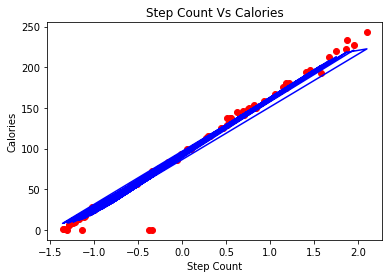

In [17]:
plt.scatter(sc_x.inverse_transform(x_train), sc_y.inverse_transform(y_train), color='red')
plt.plot(sc_x.inverse_transform(x_train), sc_y.inverse_transform(regressor.predict(x_train)), color="blue")
plt.title('Step Count Vs Calories')
plt.xlabel('Step Count')
plt.ylabel('Calories')
plt.show()

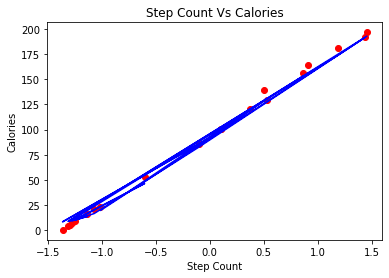

In [18]:
plt.scatter(sc_x.inverse_transform(x_test), sc_y.inverse_transform(y_test), color='red')
plt.plot(sc_x.inverse_transform(x_test), sc_y.inverse_transform(regressor.predict(x_test)), color="blue")
plt.title('Step Count Vs Calories')
plt.xlabel('Step Count')
plt.ylabel('Calories')
plt.show()